# Bibliotecas necessárias

In [1]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

# Matriz para encontrar o caminho de custo mínimo

In [2]:
def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

In [43]:
x = np.load('filt comy.npy')
y = np.load('Comy mocap.npy')

In [808]:
x = np.array([[927.44093125],
       [925.49461236],
       [924.31948641],
       [924.33762673],
       [925.60201909],
       [928.04900811],
       [931.57537762],
       [935.8550785 ],
       [940.26126577],
       [944.03708131],
       [946.47991876],
       [946.01414591],
       [943.28666413],
       [938.34667464],
       [932.74179103],
       [926.3730236 ],
       [920.20325575],
       [916.01552244],
       [912.26248857],
       [911.03415028],
       [911.2143919 ],
       [912.65268958],
       [917.19815748],
       [920.76223264],
       [924.34358154],
       [928.80653498],
       [933.66724605],
       [938.15272733],
       [939.44177039],
       [938.92965223],
       [937.34842183],
       [933.69186142],
       [928.13642362],
       [923.14579626],
       [917.68492301],
       [913.07659334],
       [911.19535444],
       [909.69622275]])

In [809]:
# Definindo a frequência de amostragem
freq_amostragem_mocap= 120
freq_amostragem_blaze=30

In [810]:
t = np.linspace(0, len(x) / freq_amostragem_blaze, len(x))
ref_t = np.linspace(0, len(y) / freq_amostragem_mocap, len(y))

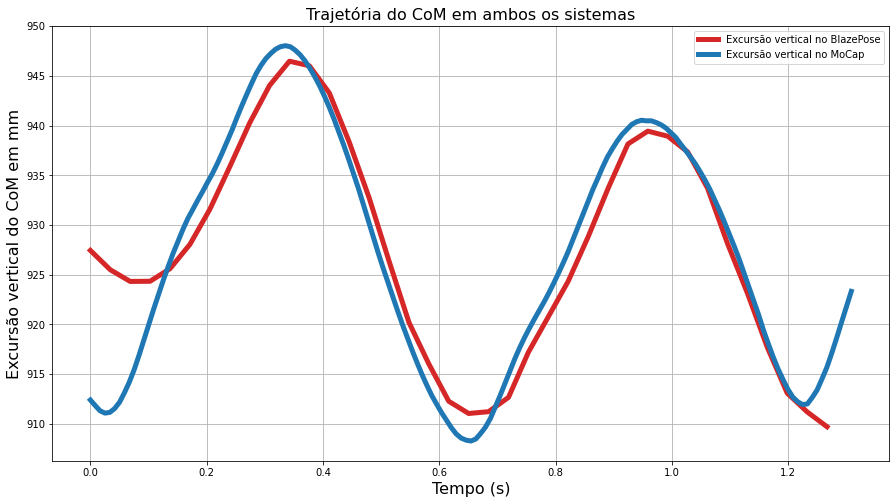

In [811]:
plt.figure(figsize=[15,8])
plt.plot(t, x, c="C3", label = 'Excursão vertical no BlazePose', linewidth=5)
plt.plot(ref_t, y, c="C0", label = 'Excursão vertical no MoCap', linewidth=5)
plt.legend()
plt.title('Trajetória do CoM em ambos os sistemas', fontsize = 16)
plt.ylabel('Excursão vertical do CoM em mm', fontsize = 16)
plt.xlabel('Tempo (s)', fontsize = 16)
plt.grid()
plt.show()

In [812]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))
path

Alignment cost: 330.8466
Normalized alignment cost: 1.6966


[(0, 0),
 (1, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (3, 15),
 (4, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (6, 20),
 (6, 21),
 (6, 22),
 (6, 23),
 (7, 24),
 (7, 25),
 (7, 26),
 (7, 27),
 (8, 28),
 (8, 29),
 (8, 30),
 (8, 31),
 (9, 32),
 (9, 33),
 (9, 34),
 (10, 35),
 (10, 36),
 (10, 37),
 (10, 38),
 (10, 39),
 (10, 40),
 (10, 41),
 (10, 42),
 (10, 43),
 (10, 44),
 (11, 45),
 (11, 46),
 (12, 47),
 (12, 48),
 (12, 49),
 (13, 50),
 (13, 51),
 (13, 52),
 (13, 53),
 (14, 54),
 (14, 55),
 (14, 56),
 (14, 57),
 (15, 58),
 (15, 59),
 (15, 60),
 (15, 61),
 (16, 62),
 (16, 63),
 (16, 64),
 (16, 65),
 (17, 66),
 (17, 67),
 (17, 68),
 (18, 69),
 (18, 70),
 (18, 71),
 (19, 72),
 (19, 73),
 (19, 74),
 (19, 75),
 (19, 76),
 (19, 77),
 (19, 78),
 (19, 79),
 (19, 80),
 (19, 81),
 (19, 82),
 (20, 83),
 (21, 84),
 (21, 85),
 (22, 86),
 (22, 87),
 (22, 88),
 (22, 89),
 (23, 90),
 (23, 91),
 (23, 92),
 (23, 93),
 (24, 94),


C:\Users\gusta\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


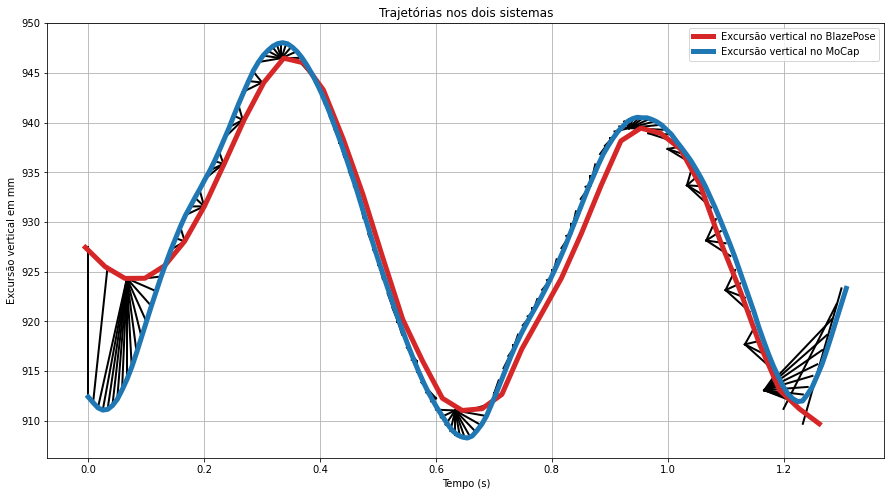

In [816]:
# Plot alignment
plt.figure(figsize=[15,8])
for x_i, y_j in path:
    plt.plot([(x_i)/(np.array(freq_amostragem_blaze)), y_j/(np.array(freq_amostragem_mocap))], ([x[x_i], y[y_j]]), 'black', linewidth=2)
plt.plot((t-0.005),x, c="C3", label = 'Excursão vertical no BlazePose', linewidth=5)
plt.plot((ref_t), y, c="C0", label = 'Excursão vertical no MoCap', linewidth=5)
plt.legend()
plt.title('Trajetórias nos dois sistemas')
plt.ylabel('Excursão vertical em mm')
plt.xlabel('Tempo (s)')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Heatmap da matriz de custo de alinhamento')

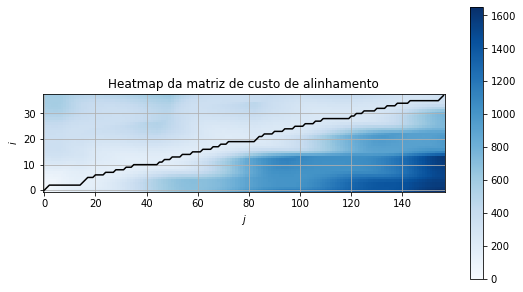

In [750]:
plt.figure(figsize=[9,5])
plt.imshow(cost_mat, cmap='Blues', interpolation="nearest", origin="lower")    
x_path, y_path = zip(*path)
plt.plot(y_path, x_path, 'black')
plt.clim([0, np.max(cost_mat)])
plt.colorbar()
plt.grid()
plt.xlabel("$j$")
plt.ylabel("$i$");
plt.title('Heatmap da matriz de custo de alinhamento')